### Our Scenario with Matrices

Once again, we have already fit our linear regression model.  This time, we predict that we will sell:
* **.35 additional T-shirts** for every dollar spent on advertising

Sales spending is our budget for having salespeople walk around or store selling T-shirts. We predict that we will sell:
* **.6 additional T-shirts** for every dollar spent on sales

The marketing department would like us to predict the number of T-shirts that will be sold if any of the following mixes of spending on advertising and sales people are pursued.

|ad spending    |sales spending    | 
| :-------------:|:-------------:|
|    200        |800        |
|    500        |600        |
|    1000      | 700      | 
|    2000      | 300      | 
|    3000      | 100      | 

$ A = \begin{pmatrix}
    200 & 800 \\
    500 & 600\\
    1000 & 700\\
    2000 & 300\\
    3000 & 100\\
\end{pmatrix}$

Below we let our coefficients equal $.35$ and $.6$, as this is what we calculated when we performed our linear regression model.  So this translates into the following expressions.

$$200*.35 + .6*800 $$

$$500*.35 + .6*600$$

$$1000*.35 + .6*700 $$

$$2000*.35 + .6*300 $$

$$3000*.35 + .6*100 $$

Next, we need to see how to write these expressions using our matrix that we defined above.

### Multiplication with matrices

We would like to translate the system of equations to use matrices.  This is our system of equations.

$$200*.35 + .6*800 $$

$$500*.35 + .6*600$$

$$1000*.35 + .6*700 $$

$$2000*.35 + .6*300 $$

$$3000*.35 + .6*100 $$

And we can represent our features variables as the following matrix.

$ A = \begin{pmatrix}
    200 & 800 \\
    500 & 600\\
    1000 & 700\\
    2000 & 300\\
    3000 & 100\\
\end{pmatrix}$

Now, what we would like to do is multiply the first column of matrix A by .35, and the second column by .6.  We can accomplish this with the following.  First we create a new vector to represent our feature variables, .35 and .6.

$x = \begin{pmatrix}
    .35 \\ .6 
\end{pmatrix} $

Then we multiply our matrix A by our vector $x$.

$A \cdot x =  \begin{pmatrix}
    200 & 800 \\
    500 & 600\\
    1000 & 700\\
    2000 & 300\\
    3000 & 100\\
\end{pmatrix} \cdot \begin{pmatrix}
    .35 \\ .6 
\end{pmatrix} $

Doing so, is equivalent to the following:

$ A \cdot x =  \begin{pmatrix}
    200 & 800 \\
    500 & 600\\
    1000 & 700\\
    2000 & 300\\
    3000 & 100\\
\end{pmatrix} \cdot \begin{pmatrix}
    .35 \\ .6 
\end{pmatrix} = .35* \begin{pmatrix}
    200  \\
    500  \\
    1000 \\
    2000 \\ 
    3000 \\ 
\end{pmatrix} + .6* \begin{pmatrix}
     800 \\
     600 \\
     700 \\
     300 \\ 
     100 \\ 
\end{pmatrix} $



Which is precisely what we want.  We want to multiply our first vector of feature variables by our first coefficient, and our second vector of feature variables by the second.

### Proving it with code

Let's walk through these steps with code.  

In [73]:
import numpy as np
x = np.array([.35, .6])
A = np.array([
    [200, 800],
    [500, 600],
    [1000, 700],
    [2000, 300],
    [3000, 100],
                 ])
A.dot(x)

array([ 550.,  535.,  770.,  880., 1110.])

> We start off by declaring our matrix $A$ and our vector $x$ in numpy, and then we multiply them together with the `dot` method.

Now we claimed that $A \cdot x$ breaks down into the following operations:

$A \cdot x =  \begin{pmatrix}
    200 & 800 \\
    500 & 600\\
    1000 & 700\\
    2000 & 300\\
    3000 & 100\\
\end{pmatrix} \cdot \begin{pmatrix}
    .35 \\ .6 
\end{pmatrix} = .35* \begin{pmatrix}
    200  \\
    500  \\
    1000 \\
    2000 \\ 
    3000 \\ 
\end{pmatrix} + .6* \begin{pmatrix}
     800 \\
     600 \\
     700 \\
     300 \\ 
     100 \\ 
\end{pmatrix}  = \begin{pmatrix}
     70 \\
     175 \\
     350 \\
     700 \\ 
     1050 \\ 
\end{pmatrix} +  \begin{pmatrix}
     480 \\
     360 \\
     420 \\
     180 \\ 
     60 \\ 
\end{pmatrix} = 
\begin{pmatrix}
     550 \\
     535 \\
     770 \\
     880 \\ 
     1010 \\ 
\end{pmatrix}
$

Let's see these steps in code:

#### Our first step: Split apart our matrices into columns

In [3]:
first_column = A[:, 0] 
first_column

array([ 200,  500, 1000, 2000, 3000])

In [4]:
second_column = A[:, 1]
second_column

array([800, 600, 700, 300, 100])

#### Second Step: Scale the two columns

> We scale the first column by the first entry in the vector $x$, and scale the second column by the second entry in the vector $x$

$.35* \begin{pmatrix}
    200  \\
    500  \\
    1000 \\
    2000 \\ 
    3000 \\ 
\end{pmatrix}$

In [8]:
scaled_first = x[0]*first_column 
scaled_first

array([  70.,  175.,  350.,  700., 1050.])

And scale the `second_column` of A by our second coefficient, $.6$.

$.6* \begin{pmatrix}
     800 \\
     600 \\
     700 \\
     300 \\ 
     100 \\ 
\end{pmatrix}$ 

In [10]:
scaled_second = x[1]*second_column
scaled_second

array([480., 360., 420., 180.,  60.])

### Step Three: Add the two scaled columns together.

In [12]:
scaled_first + scaled_second

array([ 550.,  535.,  770.,  880., 1110.])

Which is precisely what we calculated before.  

In [13]:
A.dot(x)

array([ 550.,  535.,  770.,  880., 1110.])

Once, again, this is the entire process of vector matrix multiplication broken down.

$A \cdot x =  \begin{pmatrix}
    200 & 800 \\
    500 & 600\\
    1000 & 700\\
    2000 & 300\\
    3000 & 100\\
\end{pmatrix} \cdot \begin{pmatrix}
    .35 \\ .6 
\end{pmatrix} = .35* \begin{pmatrix}
    200  \\
    500  \\
    1000 \\
    2000 \\ 
    3000 \\ 
\end{pmatrix} + .6* \begin{pmatrix}
     800 \\
     600 \\
     700 \\
     300 \\ 
     100 \\ 
\end{pmatrix}  = \begin{pmatrix}
     70 \\
     175 \\
     350 \\
     700 \\ 
     1050 \\ 
\end{pmatrix} +  \begin{pmatrix}
     480 \\
     360 \\
     420 \\
     180 \\ 
     60 \\ 
\end{pmatrix} = 
\begin{pmatrix}
     550 \\
     535 \\
     770 \\
     880 \\ 
     1010 \\ 
\end{pmatrix}
$

So really matrix vector multiplication is just a combination of what we learned before - first scaling each vector and then adding the two vectors.

### For the visual mind

Visually, and conceptually, matrix vector multiplication is just a combination of what we learned before: scaling  and then then adding.  Because it's easier to understand two-dimensional visualizations, let's just look at our first two combinations of ad spending and sales spending.

|ad spending    |sales spending    | 
| :-------------:|:-------------:|
|    200        |800        |
|    500        |600        |

As we know, when we perform matrix vector multiplication, we are really just scaling two vectors and then adding them together.

$A \cdot x =  \begin{pmatrix}
    200 & 800 \\
    500 & 600\\
\end{pmatrix} \cdot \begin{pmatrix}
    .35 \\ .6 
\end{pmatrix} = .35* \begin{pmatrix}
    200  \\
    500  \\
\end{pmatrix} + .6* \begin{pmatrix}
     800 \\
     600 \\
\end{pmatrix}  = \begin{pmatrix}
     70 \\
     175 \\
\end{pmatrix} +  \begin{pmatrix}
     480 \\
     360 \\
\end{pmatrix} = 
\begin{pmatrix}
     550 \\
     535 \\
\end{pmatrix}
$

Which visually looks like the following:

In [45]:
import numpy as np
A = np.array([[200, 800],
             [500, 600]])

### Step one: First split apart the matrix into the respective columns

In [50]:
a1 = A[:, 0]
a1

array([200, 500])

In [51]:
a2 = A[:, 1]
a2

array([800, 600])

$ a_1 = \begin{pmatrix}
    200  \\
    500 \\
\end{pmatrix} ,$
$ a_2 = \begin{pmatrix}
     800 \\
     600\\
\end{pmatrix}
$

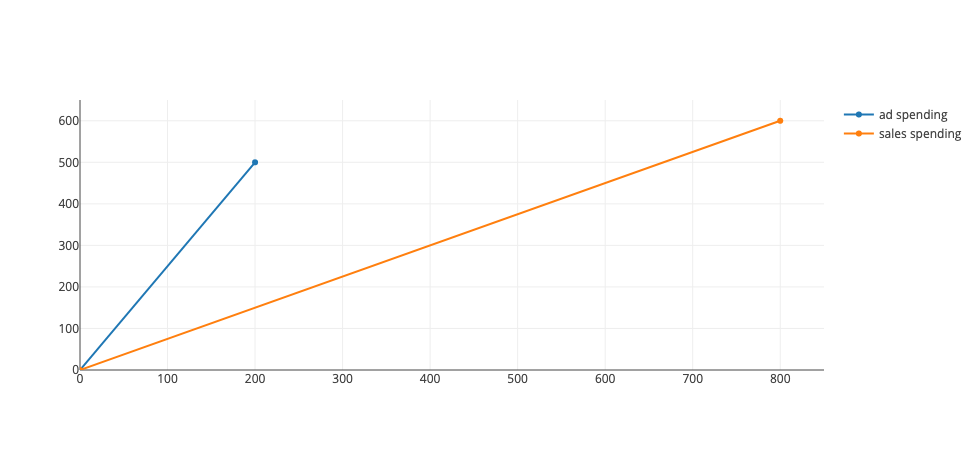

In [74]:
from graph import vector_trace, plot
ad_spending_trace = vector_trace(a_1, name = 'ad spending')
sales_spending_trace = vector_trace(a_2, name = 'sales spending')
plot([ad_spending_trace, sales_spending_trace], layout = {'xaxis': {'range': [0, 850]}, 'yaxis': {'range': [0, 650]}})

### Step Two: Then scale each of the vectors by the respective coefficients

$.35*\begin{pmatrix}
    200  \\
    500 \\
\end{pmatrix} = \begin{pmatrix}
    70  \\
    175 \\
\end{pmatrix} $

In [53]:
import numpy as np
x = np.array([.35, .60])
scaled_a1 = a1*x[0]
scaled_a1

array([ 70., 175.])

$.60*\begin{pmatrix}
     800 \\
     600\\
\end{pmatrix} = \begin{pmatrix}
     480 \\
     360\\
\end{pmatrix}$    

In [55]:
import numpy as np
x = np.array([.35, .60])
scaled_a2 = a2*x[1]
scaled_a2

array([480., 360.])

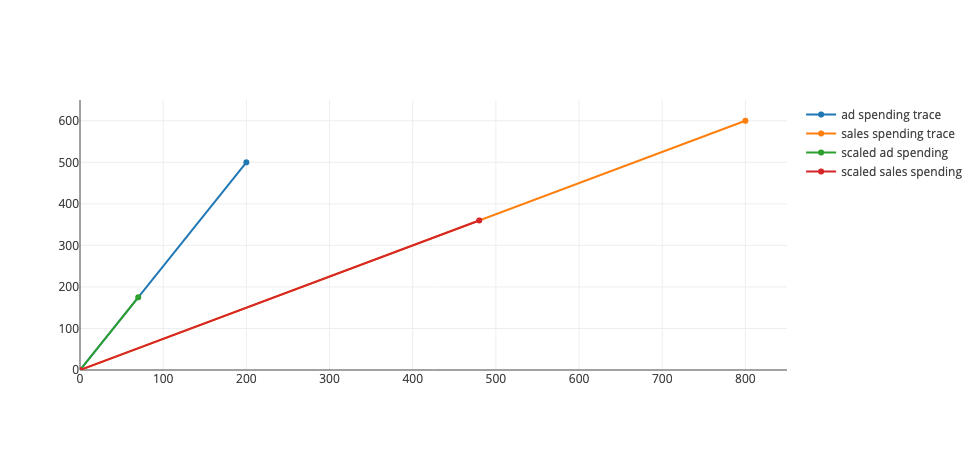

In [71]:
scaled_ad_spending_trace = vector_trace(.35*a_1, name = 'scaled ad spending')
scaled_sales_spending_trace = vector_trace(.6*a_2, name = 'scaled sales spending')
plot([ad_spending_trace, sales_spending_trace, scaled_ad_spending_trace, scaled_sales_spending_trace], layout = {'xaxis': {'range': [0, 850]}, 'yaxis': {'range': [0, 650]}})

> The green and red lines represent the scaled vectors.  Because each of the respective coefficients are less than one, we shrink the two vectors.

### Step Three: Add the two scaled vectors together

$A \cdot x =  \begin{pmatrix}
    200 & 800 \\
    500 & 600\\
\end{pmatrix} \cdot \begin{pmatrix}
    .35 \\ .6 
\end{pmatrix} = .35* \begin{pmatrix}
    200  \\
    500  \\
\end{pmatrix} + .6* \begin{pmatrix}
     800 \\
     600 \\
\end{pmatrix}  = \begin{pmatrix}
     70 \\
     175 \\
\end{pmatrix} +  \begin{pmatrix}
     480 \\
     360 \\
\end{pmatrix} 
$

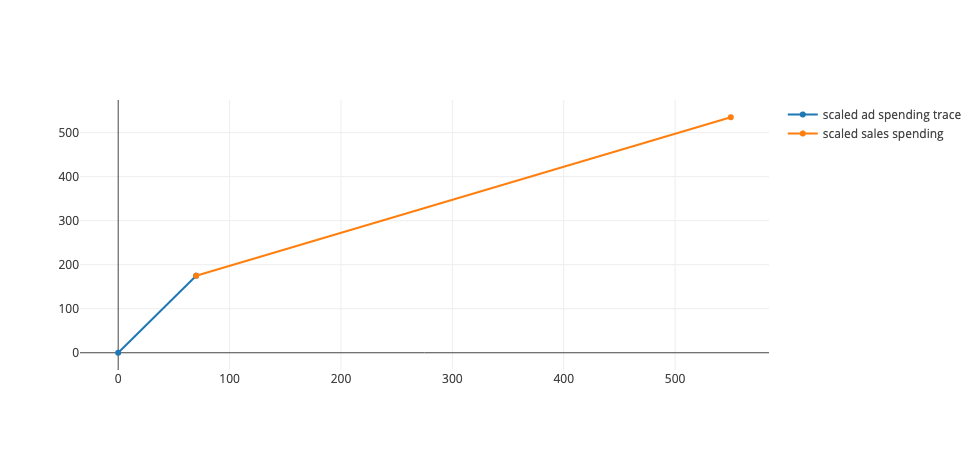

In [70]:
from graph import plus_trace
ad_plus_sales = plus_trace(np.array([70, 175]), np.array([480, 360]), name = 'scaled sales spending')
plot([scaled_ad_spending_trace, ad_plus_sales])

### Summary

In this lesson, we saw the components involved in vector matrix multiplication.  Vector matrix multiplication is performed by the following: 

1. Treating the columns of a matrix as independent columns, 
2. Scaling each column by the respective entry in the multiplying vector.  
3. Adding the scaled columns together 

We used this to predict the T-shirt sales from different combinations of ad spending and sales person spending, after we had already determined the coefficients for each.